In [1]:
import pandas as pd

In [2]:
# link to a cases dataset 
# https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country
europe_cases = pd.read_csv("europe_daily_cases.csv")

In [3]:
europe_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe


In [4]:
# link to a vaccination dataset
# https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea
# Explanation to the data
# https://www.ecdc.europa.eu/sites/default/files/documents/Variable_Dictionary_VaccineTracker-04-11-2021.pdf
vaccine = pd.read_csv("vaccine.csv")

In [5]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213293 entries, 0 to 213292
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YearWeekISO          213293 non-null  object 
 1   ReportingCountry     213293 non-null  object 
 2   Denominator          122787 non-null  float64
 3   NumberDosesReceived  31598 non-null   float64
 4   NumberDosesExported  21751 non-null   float64
 5   FirstDose            213293 non-null  int64  
 6   FirstDoseRefused     1434 non-null    float64
 7   SecondDose           213293 non-null  int64  
 8   DoseAdditional1      213293 non-null  int64  
 9   UnknownDose          213293 non-null  int64  
 10  Region               213293 non-null  object 
 11  TargetGroup          213293 non-null  object 
 12  Vaccine              213293 non-null  object 
 13  Population           213293 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 22.8+ MB


In [6]:
vaccine.head(5)

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,0.0,0.0,1,NaN,0,0,0,AT,ALL,UNK,8901064
1,2020-W53,AT,8901064.0,61425.0,0.0,5286,NaN,0,0,0,AT,ALL,COM,8901064
2,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064


In [7]:
from datetime import datetime
from isoweek import Week

def process(row):
    row = list(row)
    datetime = []
    for item in row:
        year = int(item.split("-")[0])
        week = int(item.split("-")[1][1:])
        datetime.append(Week(year, week).monday())
    return pd.Series(datetime)

In [8]:
vaccine["date"] = process(vaccine["YearWeekISO"])

In [9]:
vaccine.head()

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population,date
0,2020-W53,AT,8901064.0,0.0,0.0,1,NaN,0,0,0,AT,ALL,UNK,8901064,2020-12-28
1,2020-W53,AT,8901064.0,61425.0,0.0,5286,NaN,0,0,0,AT,ALL,COM,8901064,2020-12-28
2,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064,2020-12-28
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064,2020-12-28
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064,2020-12-28


In [10]:
vaccine = vaccine.drop(columns=["YearWeekISO"])

In [11]:
vaccine.head()

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population,date
0,AT,8901064.0,0.0,0.0,1,NaN,0,0,0,AT,ALL,UNK,8901064,2020-12-28
1,AT,8901064.0,61425.0,0.0,5286,NaN,0,0,0,AT,ALL,COM,8901064,2020-12-28
2,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064,2020-12-28
3,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064,2020-12-28
4,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064,2020-12-28


In [12]:
countries = vaccine.ReportingCountry.unique()

In [13]:
countries_data = []
for code in countries:
    countries_data.append(vaccine.loc[(vaccine["ReportingCountry"] == code) &\
                                      (vaccine["NumberDosesReceived"] != 0.0)])

In [14]:
data = vaccine.loc[vaccine["NumberDosesReceived"] != 0.0].\
               groupby(by=["ReportingCountry", "date"], as_index=False).sum().\
               drop(columns=["NumberDosesReceived", "Population",\
                             "Denominator", "NumberDosesExported"])

In [15]:
total_first = []
for code in countries:
    total_first += list(data.loc[data["ReportingCountry"] == code].FirstDose.cumsum())
data["TotalFirstDoses"] = total_first
data.head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses
0,AT,2020-12-28,10584,0.0,0,0,0,10584
1,AT,2021-01-04,52516,0.0,0,0,0,63100
2,AT,2021-01-11,170188,0.0,806,4,0,233288
3,AT,2021-01-18,186184,0.0,9214,4,0,419472
4,AT,2021-01-25,55124,0.0,35142,2,0,474596


In [16]:
total_second = []
for code in countries:
    total_second += list(data.loc[data["ReportingCountry"] == code].SecondDose.cumsum())
data["TotalSecondDoses"] = total_second
data.head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses
0,AT,2020-12-28,10584,0.0,0,0,0,10584,0
1,AT,2021-01-04,52516,0.0,0,0,0,63100,0
2,AT,2021-01-11,170188,0.0,806,4,0,233288,806
3,AT,2021-01-18,186184,0.0,9214,4,0,419472,10020
4,AT,2021-01-25,55124,0.0,35142,2,0,474596,45162


In [17]:
# validating the shape
data.shape

(1581, 9)

In [18]:
pop_dict = {}
country_codes = vaccine.ReportingCountry.unique()
population_series = []
for code in country_codes:
    serie = vaccine.loc[vaccine["ReportingCountry"] == code]["Population"].unique()
    pop_dict[code] = serie

#### that is interesting ot see, that the dataset doesnt reflect on population change

In [19]:
data["Population"] = ""
for code in country_codes:
    data.loc[data["ReportingCountry"] == code, "Population"] = pop_dict[code][0]
data.head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,Population
0,AT,2020-12-28,10584,0.0,0,0,0,10584,0,8901064
1,AT,2021-01-04,52516,0.0,0,0,0,63100,0,8901064
2,AT,2021-01-11,170188,0.0,806,4,0,233288,806,8901064
3,AT,2021-01-18,186184,0.0,9214,4,0,419472,10020,8901064
4,AT,2021-01-25,55124,0.0,35142,2,0,474596,45162,8901064


In [20]:
# validating the shape
data.shape

(1581, 10)

In [21]:
import matplotlib.pyplot as plt

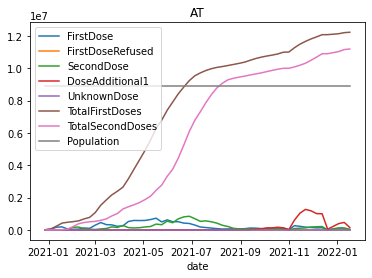

In [22]:
data.loc[data["ReportingCountry"] == 'AT'].drop(columns=["ReportingCountry"]).set_index("date").plot(title="AT")
plt.show()

In [23]:
total_data = data

In [24]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ReportingCountry  1581 non-null   object 
 1   date              1581 non-null   object 
 2   FirstDose         1581 non-null   int64  
 3   FirstDoseRefused  1581 non-null   float64
 4   SecondDose        1581 non-null   int64  
 5   DoseAdditional1   1581 non-null   int64  
 6   UnknownDose       1581 non-null   int64  
 7   TotalFirstDoses   1581 non-null   int64  
 8   TotalSecondDoses  1581 non-null   int64  
 9   Population        1581 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 123.6+ KB


In [25]:
AT_data = data.loc[data["ReportingCountry"] == 'AT'][["date", "TotalFirstDoses", "TotalSecondDoses", "DoseAdditional1"]]

In [26]:
AT_data.head()

,date,TotalFirstDoses,TotalSecondDoses,DoseAdditional1
0,2020-12-28,10584,0,0
1,2021-01-04,63100,0,0
2,2021-01-11,233288,806,4
3,2021-01-18,419472,10020,4
4,2021-01-25,474596,45162,2


In [87]:
europe_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,isoWeek,date
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17


In [28]:
europe_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  9450 non-null   object
 1   day                      9450 non-null   int64 
 2   month                    9450 non-null   int64 
 3   year                     9450 non-null   int64 
 4   cases                    9450 non-null   int64 
 5   deaths                   9450 non-null   int64 
 6   countriesAndTerritories  9450 non-null   object
 7   geoId                    9450 non-null   object
 8   countryterritoryCode     9450 non-null   object
 9   popData2020              9450 non-null   int64 
 10  continentExp             9450 non-null   object
dtypes: int64(6), object(5)
memory usage: 812.2+ KB


### Will start just with one country, to make it easier

### Later will just repeat same thing for entire dataset

In [29]:
at_cases = europe_cases.loc[europe_cases["geoId"] == "AT"]

In [56]:
at_cases.head()

,date,cases,deaths
0,2021-01-04,463496,8584
1,2021-01-11,15957,91
2,2021-02-01,6225,69
3,2021-02-08,20295,77
4,2021-03-01,7207,75


In [40]:
at_cases["isoWeek"] = pd.to_datetime(at_cases["dateRep"]).dt.strftime('%Y-W%U')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
at_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,isoWeek
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe,2022-W03
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe,2022-W03
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe,2022-W03
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe,2022-W03
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe,2022-W03


In [43]:
at_cases["date"] = process(at_cases["isoWeek"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
at_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,isoWeek,date
0,20/01/2022,20,1,2022,30085,8,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
1,19/01/2022,19,1,2022,15672,17,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
2,18/01/2022,18,1,2022,16049,3,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
3,17/01/2022,17,1,2022,16190,3,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17
4,16/01/2022,16,1,2022,17169,7,Austria,AT,AUT,8901064,Europe,2022-W03,2022-01-17


In [46]:
at_cases = at_cases[["cases", "deaths", "date", "geoId"]]

In [48]:
at_cases.head()

,cases,deaths,date,geoId
0,30085,8,2022-01-17,AT
1,15672,17,2022-01-17,AT
2,16049,3,2022-01-17,AT
3,16190,3,2022-01-17,AT
4,17169,7,2022-01-17,AT


In [50]:
at_cases = at_cases.groupby(by=["date"], as_index=False).sum()

In [52]:
at_cases.head()

,date,cases,deaths
0,2021-01-04,463496,8584
1,2021-01-11,15957,91
2,2021-02-01,6225,69
3,2021-02-08,20295,77
4,2021-03-01,7207,75


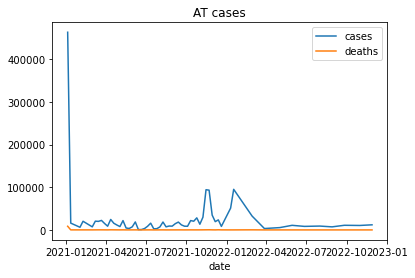

In [55]:
at_cases.set_index("date").plot(title="AT cases")
plt.show()

### Now, let's try to combine cases and vaccination

In [58]:
data.loc[data["ReportingCountry"] == 'AT'].head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,Population
0,AT,2020-12-28,10584,0.0,0,0,0,10584,0,8901064
1,AT,2021-01-04,52516,0.0,0,0,0,63100,0,8901064
2,AT,2021-01-11,170188,0.0,806,4,0,233288,806,8901064
3,AT,2021-01-18,186184,0.0,9214,4,0,419472,10020,8901064
4,AT,2021-01-25,55124,0.0,35142,2,0,474596,45162,8901064


In [62]:
at_data = pd.merge(data.loc[data["ReportingCountry"] == 'AT'], at_cases, on=["date"])

In [64]:
at_data.head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,Population,cases,deaths
0,AT,2021-01-04,52516,0.0,0,0,0,63100,0,8901064,463496,8584
1,AT,2021-01-11,170188,0.0,806,4,0,233288,806,8901064,15957,91
2,AT,2021-02-01,37134,0.0,159066,40,0,511730,204228,8901064,6225,69
3,AT,2021-02-08,49332,0.0,176624,16,0,561062,380852,8901064,20295,77
4,AT,2021-03-01,293072,0.0,27288,4,0,1070774,529710,8901064,7207,75


<AxesSubplot:title={'center':'AT'}, xlabel='date'>

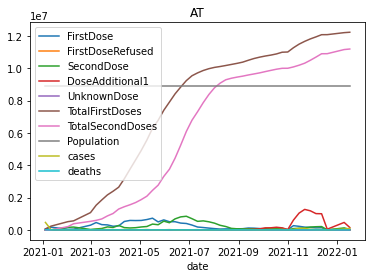

In [67]:
at_data.set_index("date").plot(title="AT")

In [74]:
plt.savefig("results/" + "AT.png")

<Figure size 432x288 with 0 Axes>

 ### Now let's do the same for entire dataset

In [100]:
cases = europe_cases
cases["isoWeek"] = pd.to_datetime(cases["dateRep"]).dt.strftime('%Y-W%U')
cases["date"] = process(cases["isoWeek"])
cases = cases[["cases", "deaths", "date", "geoId"]]
cases = cases.groupby(by=["date", "geoId"], as_index=False).sum()

In [101]:
countries_data = []
for code in country_codes:
    countries_data.append(pd.merge(data.loc[data["ReportingCountry"] == code],
             cases.loc[cases["geoId"] == code], on=["date"]))


In [102]:
countries_data[0].head()

,ReportingCountry,date,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,TotalFirstDoses,TotalSecondDoses,Population,geoId,cases,deaths
0,AT,2021-01-04,52516,0.0,0,0,0,63100,0,8901064,AT,463496,8584
1,AT,2021-01-11,170188,0.0,806,4,0,233288,806,8901064,AT,15957,91
2,AT,2021-02-01,37134,0.0,159066,40,0,511730,204228,8901064,AT,6225,69
3,AT,2021-02-08,49332,0.0,176624,16,0,561062,380852,8901064,AT,20295,77
4,AT,2021-03-01,293072,0.0,27288,4,0,1070774,529710,8901064,AT,7207,75


In [103]:
for country in countries_data:
    country["FirstDose"] /= country["Population"]
    country["FirstDoseRefused"] /= country["Population"]
    country["SecondDose"] /= country["Population"]
    country["DoseAdditional1"] /= country["Population"]
    country["UnknownDose"] /= country["Population"]
    country["TotalFirstDoses"] /= country["Population"]
    country["TotalSecondDoses"] /= country["Population"]
    country["cases"] /= country["Population"]
    country["deaths"] /= country["Population"]
    country["Population"] /= country["Population"]

<AxesSubplot:title={'center':'AT'}, xlabel='date'>

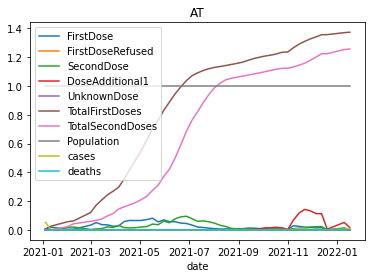

In [105]:
countries_data[0].set_index("date").plot(title="AT")

In [26]:
def plot_fig(df, code):
    fig = plt.figure()
    a = plt.plot(title=code)
    return fig

plots = []
for code in pop_dict.keys():
    plots.append(plot_fig(data.loc[data["ReportingCountry"] == code].\
          drop(columns=["ReportingCountry"]).set_index("date"),code))
with PdfPages('foo.pdf') as pdf:
    fig = plt.figure()
    for code in pop_dict.keys():
        pdf.savefig(plot_fig(data.loc[data["ReportingCountry"] == code].\
            drop(columns=["ReportingCountry"]).set_index("date"),code))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
